1. 관심 영역 : 뉴스 기사가 주가에 미치는 영향
2. 가설 : 주가의 단기적 상승/하락에 영향을 미치는 뉴스기사의 텍스트 특성이 있을 것이다.
2. 모델과 모델 선정 이유: KoBert,
많은 BERT 모델 중에서도 KoBERT를 사용한 이유는 "한국어"에 대해 많은 사전 학습이 이루어져 있고, 감정을 분석할 때, 긍정과 부정만으로 분류하는 것이 아닌 다중 분류가 가능한 것이 강점이기 때문

1. 데이터 정제 및 분석

In [62]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [63]:
!mkdir /content/project4
!unzip -qq /content/articles.zip -d /content/project4

mkdir: cannot create directory ‘/content/project4’: File exists
replace /content/project4/articles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [64]:
from google.colab import files
import pandas as pd
import numpy as np

df = pd.read_csv('/content/project4/articles.csv', header=0, index_col=0)
df.head()

,name,time,title,content,base_t,base_p,after_1h_t,after_1h_p,at_close_t,at_close_p
0,이스트아시아홀딩스,2023.01.06 14:55,작년 의무보유 해제로 시장에 풀린 주식 35억주…전년대비 7.1% 증가,지난해 LG에너지솔루션\n을 비롯해 의무보유등록에서 해제된 상장주식 수가 35억주를...,2.023011e+13,171.0,2.023011e+13,172.0,2.023011e+13,172.0
1,이스트아시아홀딩스,2022.11.11 06:08,"[마켓PRO] 워렌 버핏 스승의 전략, 한국에 적용해봤더니…",※한경 마켓PRO 텔레그램을 구독하시면 프리미엄 투자 콘텐츠를 보다 편리하게 볼 수...,2.022111e+13,198.0,2.022111e+13,201.0,2.022111e+13,198.0
2,헝셩그룹,2022.11.11 06:08,"[마켓PRO] 워렌 버핏 스승의 전략, 한국에 적용해봤더니…",※한경 마켓PRO 텔레그램을 구독하시면 프리미엄 투자 콘텐츠를 보다 편리하게 볼 수...,2.022111e+13,322.0,2.022111e+13,332.0,2.022111e+13,322.0
3,로스웰,2022.12.06 10:57,"크리스탈지노믹스, 췌장암 美 1b상 코호트1 투약 완료",크리스탈지노믹스\n는 미국에서 췌장암 치료제 후보물질 ‘아이발티노스타트’의 임상 1...,2.022121e+13,1340.0,2.022121e+13,1340.0,2.022121e+13,1340.0
4,로스웰,2022.09.20 14:09,"크리스탈지노믹스, 췌장암 美 임상 1b·2상 환자 모집 순항",크리스탈지노믹스\n는 미국에서 아이발티노스타트 췌장암 임상 1b·2상의 4번째 환자...,2.022092e+13,1575.0,2.022092e+13,1590.0,2.022092e+13,1600.0


In [65]:
df.shape

(78735, 10)

In [66]:
holdings_lst = ['BGF', 'CJ', 'CS', 'DB', 'DL', 'DSR', 'GS', 'HDC', 'HLB', 'KCC', 'KX', 'LS', 'NHN', 'NICE', 'SBS', 'SG', 'SK', 'STX', '골프존', '국보', 
                '나노', '네오위즈', '네패스', '넥센', '녹십자', '농심', '대덕', '대동', '대웅', '대원', '대유', '대창', '동방', '동양', '두산', '디아이', 
                '디와이', '디티앤씨', '레이', '마니커', '메가스터디', '모두투어', '모베이스', '미코', '바른손', '비에이치', '비엘', '삼일', '삼진', 
                '삼천리', '상상인', '샘표', '서연', '서원', '선진', '세방', '세아제강', '셀트리온', '솔브레인', '슈프리마', '신원', '신풍', '심텍', '아세아', 
                '아이윈', '에스에이티', '에스엘', '에스엠', '에스텍', '에이프로', '에코프로', '엔케이', '엔피', '영원무역', '영풍', '오리온', '오스템', 
                '우리산업', '우진', '웅진', '원익', '원풍', '웰크론', '위니아', '위메이드', '유니드', '유니온', '이녹스', '인바이오', '젬백스', '종근당', 
                '카카오', '컴투스', '케이씨', '케이엠', '코스맥스', '코아스', '코아시아', '코오롱', '큐로', '태광', '태양', '태웅', '풍산', '피에스케이', 
                '핑거', '하림', '하이트진로', '한국콜마', '한국화장품', '한진', '한창', '한화', '현대건설', '현대바이오', '현대차', '현대코퍼레이션', '화신', '효성', '휴온스', '흥국']

In [67]:
df = df.drop(df[df['name'].isin(holdings_lst)].index).reset_index(drop=True)  # holdings 제거
df

,name,time,title,content,base_t,base_p,after_1h_t,after_1h_p,at_close_t,at_close_p
0,이스트아시아홀딩스,2023.01.06 14:55,작년 의무보유 해제로 시장에 풀린 주식 35억주…전년대비 7.1% 증가,지난해 LG에너지솔루션\n을 비롯해 의무보유등록에서 해제된 상장주식 수가 35억주를...,2.023011e+13,171.0,2.023011e+13,172.0,2.023011e+13,172.0
1,이스트아시아홀딩스,2022.11.11 06:08,"[마켓PRO] 워렌 버핏 스승의 전략, 한국에 적용해봤더니…",※한경 마켓PRO 텔레그램을 구독하시면 프리미엄 투자 콘텐츠를 보다 편리하게 볼 수...,2.022111e+13,198.0,2.022111e+13,201.0,2.022111e+13,198.0
2,헝셩그룹,2022.11.11 06:08,"[마켓PRO] 워렌 버핏 스승의 전략, 한국에 적용해봤더니…",※한경 마켓PRO 텔레그램을 구독하시면 프리미엄 투자 콘텐츠를 보다 편리하게 볼 수...,2.022111e+13,322.0,2.022111e+13,332.0,2.022111e+13,322.0
3,로스웰,2022.12.06 10:57,"크리스탈지노믹스, 췌장암 美 1b상 코호트1 투약 완료",크리스탈지노믹스\n는 미국에서 췌장암 치료제 후보물질 ‘아이발티노스타트’의 임상 1...,2.022121e+13,1340.0,2.022121e+13,1340.0,2.022121e+13,1340.0
4,로스웰,2022.09.20 14:09,"크리스탈지노믹스, 췌장암 美 임상 1b·2상 환자 모집 순항",크리스탈지노믹스\n는 미국에서 아이발티노스타트 췌장암 임상 1b·2상의 4번째 환자...,2.022092e+13,1575.0,2.022092e+13,1590.0,2.022092e+13,1600.0
...,...,...,...,...,...,...,...,...,...,...
52858,코리아써키트,2022.04.15 18:57,"'깜짝 실적' 해성디에스, 사상 최고가 찍었다",사진=게티이미지뱅크\n해성디에스\n가 시장 기대치를 크게 웃도는 깜짝 실적(어닝 서...,2.022042e+13,31550.0,2.022042e+13,31350.0,2.022042e+13,31350.0
52859,코리아써키트,2022.04.13 15:20,"한미반도체, 올 매출 10% 뛸 듯…고객사 ASE, 설비투자에 '20억弗 베팅'",반도체 장비 공급사인 한미반도체는 2021년에 이어 올해도 한국 반도체 장비 업종에...,2.022041e+13,30300.0,2.022041e+13,30500.0,2.022041e+13,30200.0
52860,코리아써키트,2022.03.23 15:51,"기판 업체 증설에…""소부장株 덕산하이메탈·인텍플러스 주목""",패키지기판 호황에 기판 업체들이 앞다퉈 설비투자 계획을 발표하고 있다. 증권가에서는...,2.022032e+13,31850.0,2.022032e+13,31400.0,2.022032e+13,33800.0
52861,코리아써키트,2022.03.16 17:13,中선전 셧다운에…기판·디스플레이株 '꿈틀',2020년 초 세계 경제를 공포에 휩싸이게 했던 중국의 코로나19 대유행이 2년 만...,2.022032e+13,29700.0,2.022032e+13,30250.0,2.022032e+13,30300.0


In [68]:
example = '마켓|책마을|부고|인사|포토'    # 분석대상 기사내용이 아니고 우연성에 의해 생긴 케이스를 제거한다
df = df[~df['content'].str.contains(example)]
df.shape

(44752, 10)

In [69]:
df.isnull().sum() # 주가내용 없음. 기사작성 당일 상장되지 않았거나, 데이터 추출 당시의 기간과 웹크롤링 기간이 맞지 않아 생긴 문제로 삭제한다

name            0
time            0
title           0
content         0
base_t        886
base_p        886
after_1h_t    886
after_1h_p    886
at_close_t    886
at_close_p    886
dtype: int64

In [70]:
df = df.dropna().reset_index(drop=True)
df

,name,time,title,content,base_t,base_p,after_1h_t,after_1h_p,at_close_t,at_close_p
0,이스트아시아홀딩스,2023.01.06 14:55,작년 의무보유 해제로 시장에 풀린 주식 35억주…전년대비 7.1% 증가,지난해 LG에너지솔루션\n을 비롯해 의무보유등록에서 해제된 상장주식 수가 35억주를...,2.023011e+13,171.0,2.023011e+13,172.0,2.023011e+13,172.0
1,로스웰,2022.12.06 10:57,"크리스탈지노믹스, 췌장암 美 1b상 코호트1 투약 완료",크리스탈지노믹스\n는 미국에서 췌장암 치료제 후보물질 ‘아이발티노스타트’의 임상 1...,2.022121e+13,1340.0,2.022121e+13,1340.0,2.022121e+13,1340.0
2,로스웰,2022.09.20 14:09,"크리스탈지노믹스, 췌장암 美 임상 1b·2상 환자 모집 순항",크리스탈지노믹스\n는 미국에서 아이발티노스타트 췌장암 임상 1b·2상의 4번째 환자...,2.022092e+13,1575.0,2.022092e+13,1590.0,2.022092e+13,1600.0
3,GRT,2022.04.23 07:57,"""5000원에 산 주식이 1200원""…코스닥 中 기업, 또 먹튀 논란 [박의명의 불...",GRT 코스닥 상장 기념식. 사진=한국거래소\n한 중국계 코스닥 상장사가 공모가의 ...,2.022042e+13,1235.0,2.022043e+13,1235.0,2.022043e+13,1235.0
4,동화약품,2023.01.12 18:27,검찰 '코로나 백신' 식약처 압수수색,검찰이 코로나19 치료제 및 백신 지원 사업과 관련해 식품의약품안전처를 압수수색했다...,2.023011e+13,9400.0,2.023011e+13,9380.0,2.023011e+13,9330.0
...,...,...,...,...,...,...,...,...,...,...
43861,코리아써키트,2022.04.15 18:57,"'깜짝 실적' 해성디에스, 사상 최고가 찍었다",사진=게티이미지뱅크\n해성디에스\n가 시장 기대치를 크게 웃도는 깜짝 실적(어닝 서...,2.022042e+13,31550.0,2.022042e+13,31350.0,2.022042e+13,31350.0
43862,코리아써키트,2022.04.13 15:20,"한미반도체, 올 매출 10% 뛸 듯…고객사 ASE, 설비투자에 '20억弗 베팅'",반도체 장비 공급사인 한미반도체는 2021년에 이어 올해도 한국 반도체 장비 업종에...,2.022041e+13,30300.0,2.022041e+13,30500.0,2.022041e+13,30200.0
43863,코리아써키트,2022.03.23 15:51,"기판 업체 증설에…""소부장株 덕산하이메탈·인텍플러스 주목""",패키지기판 호황에 기판 업체들이 앞다퉈 설비투자 계획을 발표하고 있다. 증권가에서는...,2.022032e+13,31850.0,2.022032e+13,31400.0,2.022032e+13,33800.0
43864,코리아써키트,2022.03.16 17:13,中선전 셧다운에…기판·디스플레이株 '꿈틀',2020년 초 세계 경제를 공포에 휩싸이게 했던 중국의 코로나19 대유행이 2년 만...,2.022032e+13,29700.0,2.022032e+13,30250.0,2.022032e+13,30300.0


In [71]:
# 등락율 컬럼 추가
condition = ((df['after_1h_p'] - df['base_p'])/df['base_p'])*100
df['등락율(%)'] = condition
df.head()

,name,time,title,content,base_t,base_p,after_1h_t,after_1h_p,at_close_t,at_close_p,등락율(%)
0,이스트아시아홀딩스,2023.01.06 14:55,작년 의무보유 해제로 시장에 풀린 주식 35억주…전년대비 7.1% 증가,지난해 LG에너지솔루션\n을 비롯해 의무보유등록에서 해제된 상장주식 수가 35억주를...,2.023011e+13,171.0,2.023011e+13,172.0,2.023011e+13,172.0,0.584795
1,로스웰,2022.12.06 10:57,"크리스탈지노믹스, 췌장암 美 1b상 코호트1 투약 완료",크리스탈지노믹스\n는 미국에서 췌장암 치료제 후보물질 ‘아이발티노스타트’의 임상 1...,2.022121e+13,1340.0,2.022121e+13,1340.0,2.022121e+13,1340.0,0.000000
2,로스웰,2022.09.20 14:09,"크리스탈지노믹스, 췌장암 美 임상 1b·2상 환자 모집 순항",크리스탈지노믹스\n는 미국에서 아이발티노스타트 췌장암 임상 1b·2상의 4번째 환자...,2.022092e+13,1575.0,2.022092e+13,1590.0,2.022092e+13,1600.0,0.952381
3,GRT,2022.04.23 07:57,"""5000원에 산 주식이 1200원""…코스닥 中 기업, 또 먹튀 논란 [박의명의 불...",GRT 코스닥 상장 기념식. 사진=한국거래소\n한 중국계 코스닥 상장사가 공모가의 ...,2.022042e+13,1235.0,2.022043e+13,1235.0,2.022043e+13,1235.0,0.000000
4,동화약품,2023.01.12 18:27,검찰 '코로나 백신' 식약처 압수수색,검찰이 코로나19 치료제 및 백신 지원 사업과 관련해 식품의약품안전처를 압수수색했다...,2.023011e+13,9400.0,2.023011e+13,9380.0,2.023011e+13,9330.0,-0.212766


In [72]:
# 등락율에 따른 label 삽입
import math
def func(x) :
  if x < 0:
    return "0% 미만"
  # elif math.floor(x) == 0 :
      # return "1%미만 상승"
  elif x >= 0 and x < 5:
    return "5% 미만"
  # elif x >= 5 and x < 10 :
    # return "5~10% 상승"
  else:
    return "5% 이상"
df["label"] = df["등락율(%)"].apply(lambda x : func(x))

In [73]:
# 필요한 데이터만 추출
df = df[['content', 'label']]
# 최종 데이터 크기 확인
df

,content,label
0,지난해 LG에너지솔루션\n을 비롯해 의무보유등록에서 해제된 상장주식 수가 35억주를...,5% 미만
1,크리스탈지노믹스\n는 미국에서 췌장암 치료제 후보물질 ‘아이발티노스타트’의 임상 1...,5% 미만
2,크리스탈지노믹스\n는 미국에서 아이발티노스타트 췌장암 임상 1b·2상의 4번째 환자...,5% 미만
3,GRT 코스닥 상장 기념식. 사진=한국거래소\n한 중국계 코스닥 상장사가 공모가의 ...,5% 미만
4,검찰이 코로나19 치료제 및 백신 지원 사업과 관련해 식품의약품안전처를 압수수색했다...,0% 미만
...,...,...
43861,사진=게티이미지뱅크\n해성디에스\n가 시장 기대치를 크게 웃도는 깜짝 실적(어닝 서...,0% 미만
43862,반도체 장비 공급사인 한미반도체는 2021년에 이어 올해도 한국 반도체 장비 업종에...,5% 미만
43863,패키지기판 호황에 기판 업체들이 앞다퉈 설비투자 계획을 발표하고 있다. 증권가에서는...,0% 미만
43864,2020년 초 세계 경제를 공포에 휩싸이게 했던 중국의 코로나19 대유행이 2년 만...,5% 미만


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_te

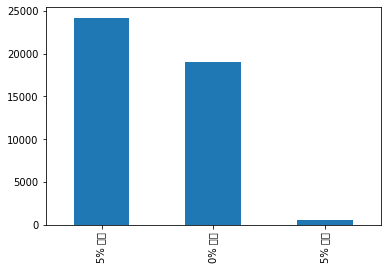

In [74]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
values = df['label'].value_counts()        # label 데이터 분포포 
values.plot(kind='bar')

In [75]:
df['label'].value_counts(normalize=True)

5% 미만    0.551224
0% 미만    0.434687
5% 이상    0.014088
Name: label, dtype: float64

2. 데이터 불균형 해소를 위한 Data undersampling 방법

In [76]:
# 데이터 불균형 완화 위해 데이터 언더샘플링 시도
X=df[['content']]
y=df['label']
from imblearn.under_sampling import RandomUnderSampler
X_samp, y_samp=RandomUnderSampler(random_state=0).fit_resample(X,y)
df_samp=pd.concat([X_samp, y_samp], axis=1)
df_samp['label'].value_counts()

0% 미만    618
5% 미만    618
5% 이상    618
Name: label, dtype: int64

In [77]:
df_samp

,content,label
0,서울 삼성동 코엑스에서 지난 14~15일 열린 한경 집코노미 박람회 2022 행사에...,0% 미만
1,사진=게티이미지뱅크\n증시 약세와 투자심리 악화로 투자자들이 증시에서 돈을 빼고 있...,0% 미만
2,항우연 연구진 ‘환호’ 5일 대전 한국항공우주연구원 연구진이 다누리와 팰컨9 분리 ...,0% 미만
3,엔데믹(전염병의 풍토병화)이 가까워지면서 리오프닝(경제활동 재개) 대장주로 꼽히는 ...,0% 미만
4,삼성생명은 올 들어 대대적인 건강자산 캠페인을 펼치는 등 헬스케어 사업에 본격적으로...,0% 미만
...,...,...
1849,에이프로젠 오송공장 전경 / 사진 제공=에이프로젠\n에이프로젠은 에이프로젠메디신( ...,5% 이상
1850,사료 관련 테마주가 연일 급등세를 보이고 있다. 최근 인플레이션이 증시의 최대 화두...,5% 이상
1851,사진=게티이미지뱅크\n코스피 지수가 2700선을 두고 지루한 공방을 벌이고 있는 가...,5% 이상
1852,중국이 3년 만에 해외 입국자에 대한 빗장을 풀면서 항공주와 여행주가 일제히 상승했...,5% 이상


In [78]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-o5s5lfhw
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-o5s5lfhw
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done


In [79]:
# Pytorch
import torch
from kobert import get_pytorch_kobert_model

In [80]:
!pip install 'git+https://github.com/SKTBrain/KOBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KOBERT.git to /tmp/pip-install-a3qcvptj/kobert-tokenizer_34569a25919345e58b7d88b24cbef5a6
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KOBERT.git /tmp/pip-install-a3qcvptj/kobert-tokenizer_34569a25919345e58b7d88b24cbef5a6
  Resolved https://github.com/SKTBrain/KOBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done


In [81]:
input_ids = torch.LongTensor([[31, 51, 99], [15, 5, 0]])
input_mask = torch.LongTensor([[1, 1, 1], [1, 1, 0]])
token_type_ids = torch.LongTensor([[0, 0, 1], [0, 1, 0]])
bertmodel, vocab  = get_pytorch_kobert_model()  # 모델
vocab

# tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
# bertmodel, vocab = get_kobert_model('skt/kobert-base-v1',tokenizer.vocab_file)

using cached model. /content/.cache/kobert_v1.zip
using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


Vocab(size=8002, unk="[UNK]", reserved="['[CLS]', '[SEP]', '[MASK]', '[PAD]']")

In [82]:
# pooled_output size 확인
sequence_output, pooled_output = bertmodel(input_ids, input_mask, token_type_ids)
pooled_output.shape

torch.Size([2, 768])

In [83]:
# tokenizer
# from gluonnlp.data import SentencepieceTokenizer
# from kobert import get_tokenizer
# sentence = "검찰 '코로나 백신' 식약처 압수수색"
# tok_path = get_tokenizer()
# sp  = SentencepieceTokenizer(tok_path)
# sp(sentence)

Hugging face API(참고)

In [84]:
# tokenizer from hugging face tokenizer
from kobert import get_tokenizer
from kobert_tokenizer import KoBERTTokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1', sp_model_kwargs={'nbest_size': -1, 'alpha': 0.6, 'enable_sampling': True})  # kwargs : 띄워쓰기를 더 잘 한다

In [85]:
# model 불러오기기 in differnet way
from transformers import BertModel
sentence = "한국어 모델을 공유합니다."
model = BertModel.from_pretrained('skt/kobert-base-v1')
inputs = tokenizer.batch_encode_plus([sentence])  
# inputs
out = model(input_ids = torch.tensor(inputs['input_ids']),attention_mask = torch.tensor(inputs['attention_mask']))
print(out.last_hidden_state.shape, out.pooler_output.shape)

torch.Size([1, 9, 768]) torch.Size([1, 768])


In [86]:
# 리스트 형태로 반환하는 encode_plus 확인
# inputs = tokenizer.encode(sentence) # token id
# tokenizer.encode_plus(sentence)  # token id, token_type_ids, attention_mask
# tokenizer.decode([2, 900, 520, 7533, 6079, 5655, 2298, 6733, 15, 3006, 6846, 7416, 3183, 3])
# tokenizer.decode([2, 4958, 6855, 2046, 7088, 1050, 7843, 54, 3])
# tokenizer.decode([2, 900, 520, 7533, 6079, 5655, 2298, 6733, 15, 3006, 6846, 7416, 3183, 3])

In [87]:
tokenizer.vocab_size

8002

In [88]:
# 모델 학습에 필요한 라이브러리 import
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# from torchmetrics.text.bert import BERTScore
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
import pandas as pd
import sqlite3

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

#GPU 사용 시
device = torch.device("cuda:0")

In [89]:
# 인풋할 수 있도록 데이터셋 토큰화화
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer,vocab, max_len,
                 pad, pair):
   
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))
         

    def __len__(self):
        return (len(self.labels))

In [90]:
df_samp.loc[(df_samp['label'] == "0% 미만"), 'label'] = 0  
df_samp.loc[(df_samp['label'] == "5% 미만"), 'label'] = 1  
df_samp.loc[(df_samp['label'] == "5% 이상"), 'label'] = 2  



data_list = []
for ques, label in zip(df_samp['content'], df_samp['label'])  :
    data = []   
    data.append(ques)
    data.append(str(label))

    data_list.append(data)
# data_list

In [99]:
# 데이터 나누기(7:3)
print(len(data_list)*0.7) # 1297.8
train = data_list[:1297]
test = data_list[1297::]
len(train), len(test)

1297.8


(1297, 557)

In [100]:
# Setting parameters
max_len = 256  # 512가 Bert model의 최대치, out of memory
batch_size = 8
warmup_ratio = 0.1
num_epochs = 5  
max_grad_norm = 1
log_interval = 50
learning_rate =  5e-5

In [101]:
tok=tokenizer.tokenize
data_train = BERTDataset(train, 0, 1, tok, vocab, max_len, True, False)
data_test = BERTDataset(test, 0, 1, tok, vocab,  max_len, True, False)

In [102]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [96]:
# 모델 구현하기
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=3,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
        
        self.classifier1 = nn.Linear(hidden_size , num_classes*2)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
        # self.batchnormalization = nn.BatchNorm1d(num_classes*2) # 언더샘플링으로 데이터셋의 크기가 작아지니 size=1인 batch가 생겨서 batchnorm 사용 안한다
        self.classifier2 = nn.Linear(num_classes*2 , num_classes)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        out = self.classifier1(out)
        # out = self.batchnormalization(out)
        return self.classifier2(out)

In [103]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
 
#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 대표적인 loss func

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

In [104]:
torch.cuda.empty_cache()
# 학습
train_history=[]
test_history=[]
loss_history=[]
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
         
        # print(label.shape,out.shape)   #torch.Size([8]) torch.Size([8, 3])
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)

        if batch_id !=0 and batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))  # batch id 200당
            train_history.append(train_acc / (batch_id+1))
            loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    # train_history.append(train_acc / (batch_id+1))   # epoch당
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1))

<ipython-input-104-9fd9fadc2f0e>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/163 [00:00<?, ?it/s]

epoch 1 batch id 51 loss 0.11822251230478287 train acc 0.7450980392156863
epoch 1 batch id 101 loss 0.5116837024688721 train acc 0.7178217821782178
epoch 1 batch id 151 loss 0.026030002161860466 train acc 0.8112582781456954
epoch 1 train acc 0.7730061349693251


<ipython-input-104-9fd9fadc2f0e>:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/70 [00:00<?, ?it/s]

epoch 1 test acc 0.0


  0%|          | 0/163 [00:00<?, ?it/s]

epoch 2 batch id 51 loss 0.004794600419700146 train acc 0.7794117647058824
epoch 2 batch id 101 loss 0.13946914672851562 train acc 0.7896039603960396
epoch 2 batch id 151 loss 0.011656212620437145 train acc 0.859271523178808
epoch 2 train acc 0.8174846625766872


  0%|          | 0/70 [00:00<?, ?it/s]

epoch 2 test acc 1.0


  0%|          | 0/163 [00:00<?, ?it/s]

epoch 3 batch id 51 loss 0.0037755686789751053 train acc 0.9436274509803921
epoch 3 batch id 101 loss 0.02158108539879322 train acc 0.8948019801980198
epoch 3 batch id 151 loss 0.006920293439179659 train acc 0.929635761589404
epoch 3 train acc 0.8826687116564417


  0%|          | 0/70 [00:00<?, ?it/s]

epoch 3 test acc 0.0


  0%|          | 0/163 [00:00<?, ?it/s]

epoch 4 batch id 51 loss 0.018860353156924248 train acc 0.30637254901960786
epoch 4 batch id 101 loss 0.6001952886581421 train acc 0.422029702970297
epoch 4 batch id 151 loss 0.016216052696108818 train acc 0.6134105960264901
epoch 4 train acc 0.5989263803680982


  0%|          | 0/70 [00:00<?, ?it/s]

epoch 4 test acc 1.0


  0%|          | 0/163 [00:00<?, ?it/s]

epoch 5 batch id 51 loss 0.0056734695099294186 train acc 0.9852941176470589
epoch 5 batch id 101 loss 0.03376185521483421 train acc 0.8527227722772277
epoch 5 batch id 151 loss 0.01597796194255352 train acc 0.9014900662251656
epoch 5 train acc 0.8565950920245399


  0%|          | 0/70 [00:00<?, ?it/s]

epoch 5 test acc 0.0


In [105]:
# torch.save(model, f'/content/drive/MyDrive/Colab Notebooks/ArticlesAnalysisKOBert2.pt')   # model 저장

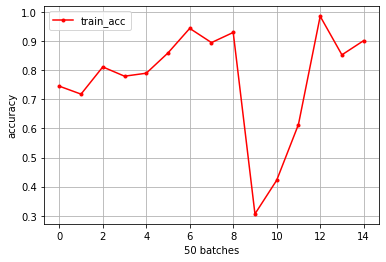

In [106]:
import numpy as np
import matplotlib.pyplot as plt

xtrain_len = np.arange(len(train_history))
xtest_len = np.arange(len(test_history))
plt.plot(xtrain_len, train_history, marker='.', c='red', label='train_acc')
# plt.plot(xtest_len, test_history, marker='.', c='blue', label='test_acc')
plt.legend()
plt.xlabel('50 batches')
plt.ylabel('accuracy')
plt.grid()
plt.show()

**undersampling으로는 전혀 학습이 안된다**

3. 데이터 불균형 완화를 위한 Data augmentation 방법

In [107]:
# 데이터 불균형 완화를 위해 Data Augmention 오픈소스 차용(Github), 데이터 의미 변형을 방지하기 위해 rs, rd만 사용한다
import random
import pickle
import re

random.seed(42)
# wordnet = {}
# with open("wordnet.pickle", "rb") as f:
	# wordnet = pickle.load(f)


# 한글만 남기고 나머지는 삭제
def get_only_hangul(line):
	parseText= re.compile('/ ^[ㄱ-ㅎㅏ-ㅣ가-힣]*$/').sub('',line)

	return parseText



########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################
def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			num_replaced += 1
		if num_replaced >= n:
			break

	if len(new_words) != 0:
		sentence = ' '.join(new_words)
		new_words = sentence.split(" ")

	else:
		new_words = ""

	return new_words


def get_synonyms(word):
	synomyms = []

	try:
		for syn in wordnet[word]:
			for s in syn:
				synomyms.append(s)
	except:
		pass

	return synomyms

########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################
def random_deletion(words, p):
	if len(words) == 1:
		return words

	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################
def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

########################################################################
# Random insertion
# Randomly insert n words into the sentence
########################################################################
def random_insertion(words, n):
	new_words = words.copy()
	for _ in range(n):
		add_word(new_words)
	
	return new_words


def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		if len(new_words) >= 1:
			random_word = new_words[random.randint(0, len(new_words)-1)]
			synonyms = get_synonyms(random_word)
			counter += 1
		else:
			random_word = ""

		if counter >= 10:
			return
		
	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)



def EDA(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=9):
	sentence = get_only_hangul(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not ""]
	num_words = len(words)

	augmented_sentences = []
	num_new_per_technique = int(num_aug/4) + 1

	n_sr = max(1, int(alpha_sr*num_words))
	n_ri = max(1, int(alpha_ri*num_words))
	n_rs = max(1, int(alpha_rs*num_words))

	# sr
	# for _ in range(num_new_per_technique):
		# a_words = synonym_replacement(words, n_sr)
		# augmented_sentences.append(' '.join(a_words))

	# ri
	# for _ in range(num_new_per_technique):
		# a_words = random_insertion(words, n_ri)
		# augmented_sentences.append(' '.join(a_words))

	# rs
	for _ in range(num_new_per_technique):
		a_words = random_swap(words, n_rs)
		augmented_sentences.append(" ".join(a_words))

	# rd
	for _ in range(num_new_per_technique):
		a_words = random_deletion(words, p_rd)
		augmented_sentences.append(" ".join(a_words))

	augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]
	random.shuffle(augmented_sentences)

	if num_aug >= 1:
		augmented_sentences = augmented_sentences[:num_aug]
	else:
		keep_prob = num_aug / len(augmented_sentences)
		augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

	augmented_sentences.append(sentence)

	return augmented_sentences[0]


<>:140: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:140: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-107-795dc885ecd2>:140: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not ""]


In [108]:
len(df)*0.7

30706.199999999997

In [109]:
# 데이터셋 분리
len(df)*0.7   # 30706.2
train = df.iloc[:30706,:]
test = df.iloc[30706:,:]
train.shape, test.shape

((30706, 2), (13160, 2))

In [110]:
train[train['label']=='5% 이상']['content']

36       러시아·우크라이나 전쟁 여파로 사료 가격이 오르자 국제 돈육·생우 가격이 덩달아 치...
57       자사주 소각, 지배구조 개편 등 주주친화 정책을 강화하는 기업들이 주목받고 있다. ...
58       사진=게티이미지뱅크\n자사주 소각, 지배구조 개편 등 주주친화 정책을 강화하는 기업...
60       메리츠금융지주가 메리츠화재와 메리츠증권을 지분율 100%의 완전 자회사로 편입한다....
61       메리츠금융그룹은 국내 상장사로는 드물게 자사주 매입·소각을 통한 주주가치 제고에 집...
                               ...                        
30435    DL이앤씨\n는 24일 이사회를 열고 증자비율 100%의 무상증자를 결정했다. 기존...
30436    서울 종로구 평동에 자리한 DL이앤씨 사옥 'D타워 돈의문'\nDL이앤씨는 24일 ...
30622    작년까지 장외 주식은 ‘긁지 않은 복권’으로 불렸다. 핀테크, 바이오 등 유망 사업...
30632    ※한국경제신문은 제6대 금융투자협회장 선거 출마자들을 릴레이 인터뷰합니다. 금융투자...
30664    데이터센터 화재로 '서비스 먹통 사태'가 발생한 카카오 그룹주 주가가 추락했다. 자...
Name: content, Length: 378, dtype: object

In [111]:
def aug_data(df):
  return df[df['label']=='5% 이상']['content'].apply(EDA)
df_aug1 = aug_data(train).reset_index(drop=True)
df_aug1

0      러시아·우크라이나 전쟁 여파로 사료 가격이 오르자 국제 돈육·생우 상승의 덩달아 치...
1      자사주 지배구조 개편 등 주주친화 강화하는 기업들이 주목받고 있다. 주주가치 제고 ...
2      사진=게티이미지뱅크\n자사주 소각, 지배구조 개편 등 주주친화 정책을 강화하는 기준...
3      메리츠금융지주가 메리츠화재와 메리츠증권을 21일 100%의 완전 자회사로 편입한다....
4      메리츠금융그룹은 할 상장사로는 드물게 자사주 매입·소각을 통한 주주가치 제고에 집중...
                             ...                        
373    DL이앤씨\n는 24일 이사회를 열고 증자비율 100%의 무상증자를 결정했다. 기존...
374    서울 종로구 평동에 자리한 DL이앤씨 사옥 'D타워 돈의문'\nDL이앤씨는 24일 ...
375    배달플랫폼 유망 주식은 ‘긁지 않은 복권’으로 불렸다. 핀테크, 바이오 등 유망 사...
376    ※한국경제신문은 제6대 금융투자협회장 선거 출마자들을 인터뷰합니다. 금융투자협회장 ...
377    데이터센터 화재로 '서비스 먹통 사태'가 발생한 카카오 그룹주 주가가 추락했다. 자...
Name: content, Length: 378, dtype: object

In [112]:
import pandas as pd
import numpy as np
# 10배 증강 for train
df_series1 = aug_data(train).reset_index(drop=True)
df_series2 = aug_data(train).reset_index(drop=True)
df_series3 = aug_data(train).reset_index(drop=True)
df_series4 = aug_data(train).reset_index(drop=True)
df_series5 = aug_data(train).reset_index(drop=True)
df_series6 = aug_data(train).reset_index(drop=True)
df_series7 = aug_data(train).reset_index(drop=True)
df_series8 = aug_data(train).reset_index(drop=True)
df_series9 = aug_data(train).reset_index(drop=True)
df_series10 = aug_data(train).reset_index(drop=True)

df_stitched = pd.concat([df_series1, df_series2, df_series3, df_series4, df_series5, df_series6, df_series7, df_series8, df_series9, df_series10], ignore_index=True)

print (df_stitched)

0       전쟁 사료 가격이 오르자 국제 돈육·생우 가격이 덩달아 치솟고 있다. 리오프닝(경제...
1       자사주 소각, 지배구조 등 주주친화 정책을 기업들이 주목받고 있다. 주주가치 제고 ...
2       사진=게티이미지뱅크\n자사주 소각, 지배구조 개편 등 주주친화 정책을 강화하는 기업...
3       메리츠금융지주가 증권이 메리츠증권을 증권 100%의 완전 자회사로 편입한다. 화재와...
4       메리츠금융그룹은 국내 회장의 합병이 자사주 매입·소각을 통한 주주가치 제고에 집중해...
                              ...                        
3775    DL이앤씨\n는 24일 이사회를 열고 증자비율 100%의 향후 결정했다. 기존 주식...
3776    서울 종로구 평동에 자리한 DL이앤씨 사옥 'D타워 돈의문'\nDL이앤씨는 24일 ...
3777    작년까지 장외 주식은 ‘긁지 않은 복권’으로 불렸다. 핀테크, 바이오 등 유망 사업...
3778    제6대 금융투자협회장 선거 출마자들을 릴레이 인터뷰합니다. 금융투자협회장 선거는 3...
3779    데이터센터 화재로 카카오게임즈(-5.10%)와 먹통 사태'가 발생한 개장 그룹주 3...
Name: content, Length: 3780, dtype: object


In [113]:
y_list = []
for i in range(3780):
  y_list += ['5% 이상']
len(y_list)

3780

In [114]:
y_series = pd.Series(y_list)
y_series

0       5% 이상
1       5% 이상
2       5% 이상
3       5% 이상
4       5% 이상
        ...  
3775    5% 이상
3776    5% 이상
3777    5% 이상
3778    5% 이상
3779    5% 이상
Length: 3780, dtype: object

In [115]:
# data augrementation처리된 'content'열과 'target'열 병합
df_train = pd.concat([df_stitched, y_series], axis=1)
df_train.columns = ['content', 'label']
df_train

,content,label
0,전쟁 사료 가격이 오르자 국제 돈육·생우 가격이 덩달아 치솟고 있다. 리오프닝(경제...,5% 이상
1,"자사주 소각, 지배구조 등 주주친화 정책을 기업들이 주목받고 있다. 주주가치 제고 ...",5% 이상
2,"사진=게티이미지뱅크\n자사주 소각, 지배구조 개편 등 주주친화 정책을 강화하는 기업...",5% 이상
3,메리츠금융지주가 증권이 메리츠증권을 증권 100%의 완전 자회사로 편입한다. 화재와...,5% 이상
4,메리츠금융그룹은 국내 회장의 합병이 자사주 매입·소각을 통한 주주가치 제고에 집중해...,5% 이상
...,...,...
3775,DL이앤씨\n는 24일 이사회를 열고 증자비율 100%의 향후 결정했다. 기존 주식...,5% 이상
3776,서울 종로구 평동에 자리한 DL이앤씨 사옥 'D타워 돈의문'\nDL이앤씨는 24일 ...,5% 이상
3777,"작년까지 장외 주식은 ‘긁지 않은 복권’으로 불렸다. 핀테크, 바이오 등 유망 사업...",5% 이상
3778,제6대 금융투자협회장 선거 출마자들을 릴레이 인터뷰합니다. 금융투자협회장 선거는 3...,5% 이상


In [116]:
train.shape

(30706, 2)

In [117]:
# 원래 데이터와 병합, 30706에서 34486으로 데이터 증가
train_made = pd.concat([train, df_train], axis=0, ignore_index=True)
train_made.shape

(34486, 2)

In [118]:
train_made

,content,label
0,지난해 LG에너지솔루션\n을 비롯해 의무보유등록에서 해제된 상장주식 수가 35억주를...,5% 미만
1,크리스탈지노믹스\n는 미국에서 췌장암 치료제 후보물질 ‘아이발티노스타트’의 임상 1...,5% 미만
2,크리스탈지노믹스\n는 미국에서 아이발티노스타트 췌장암 임상 1b·2상의 4번째 환자...,5% 미만
3,GRT 코스닥 상장 기념식. 사진=한국거래소\n한 중국계 코스닥 상장사가 공모가의 ...,5% 미만
4,검찰이 코로나19 치료제 및 백신 지원 사업과 관련해 식품의약품안전처를 압수수색했다...,0% 미만
...,...,...
34481,DL이앤씨\n는 24일 이사회를 열고 증자비율 100%의 향후 결정했다. 기존 주식...,5% 이상
34482,서울 종로구 평동에 자리한 DL이앤씨 사옥 'D타워 돈의문'\nDL이앤씨는 24일 ...,5% 이상
34483,"작년까지 장외 주식은 ‘긁지 않은 복권’으로 불렸다. 핀테크, 바이오 등 유망 사업...",5% 이상
34484,제6대 금융투자협회장 선거 출마자들을 릴레이 인터뷰합니다. 금융투자협회장 선거는 3...,5% 이상


In [119]:
train_made['label'].value_counts(normalize=True)  # 0.01에서 어느 정도 완화, 베이스 모델 기준 0.487

5% 미만    0.487734
0% 미만    0.391695
5% 이상    0.120571
Name: label, dtype: float64

In [120]:
# data split : data augmentation 병합으로 인해 시계열에 따라 분리하지 못하고 shuffle split
train_made.loc[(train_made['label'] == "0% 미만"), 'label'] = 0  
train_made.loc[(train_made['label'] == "5% 미만"), 'label'] = 1  
train_made.loc[(train_made['label'] == "5% 이상"), 'label'] = 2  

test.loc[(test['label'] == "0% 미만"), 'label'] = 0  
test.loc[(test['label'] == "5% 미만"), 'label'] = 1  
test.loc[(test['label'] == "5% 이상"), 'label'] = 2  



train_lst = []
for ques, label in zip(train_made['content'], train_made['label'])  :
    data = []   
    data.append(ques)
    data.append(str(label))

    train_lst.append(data)
# shuffle
random.shuffle(train_lst)

test_lst = []
for ques, label in zip(test['content'], test['label'])  :
    data = []   
    data.append(ques)
    data.append(str(label))

    test_lst.append(data)

len(train_lst), len(test_lst)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


(34486, 13160)

In [127]:
# Setting parameters 메모리 크기에 따라 유동적으로 설정정
max_len = 256  # 512가 Bert model의 최대치, out of memory
batch_size = 8
warmup_ratio = 0.1
num_epochs = 5  
max_grad_norm = 1
log_interval = 200
learning_rate =  1e-5

In [122]:
# token
tok=tokenizer.tokenize
data_train = BERTDataset(train_lst, 0, 1, tok, vocab, max_len, True, False)
data_test = BERTDataset(test_lst, 0, 1, tok, vocab,  max_len, True, False)

train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [123]:
# 모델 구현하기
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=3,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
        
        self.classifier1 = nn.Linear(hidden_size , num_classes*2)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
        self.batchnormalization = nn.BatchNorm1d(num_classes*2)
        self.classifier2 = nn.Linear(num_classes*2 , num_classes)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        out = self.classifier1(out)
        out = self.batchnormalization(out)
        return self.classifier2(out)

In [124]:
#BERT 모델 불러오기
model2 = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
 
#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model2.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model2.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 대표적인 loss func

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

In [128]:
torch.cuda.empty_cache()
# 학습
train_history=[]
test_history=[]
train_history_batch=[]
loss_history_batch=[]
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model2.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model2(token_ids, valid_length, segment_ids)
         
        # print(label.shape,out.shape)   #torch.Size([8]) torch.Size([8, 3])
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)

        if batch_id !=0 and batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))  # batch id 200당
            train_history_batch.append(train_acc / (batch_id+1))
            loss_history_batch.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    train_history.append(train_acc / (batch_id+1))   # epoch당
    
    model2.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1))

<ipython-input-128-4016398f29df>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/4311 [00:00<?, ?it/s]

epoch 1 batch id 201 loss 1.3356283903121948 train acc 0.3644278606965174
epoch 1 batch id 401 loss 1.1702121496200562 train acc 0.37281795511221943
epoch 1 batch id 601 loss 1.3101221323013306 train acc 0.36959234608985025
epoch 1 batch id 801 loss 0.9731912612915039 train acc 0.3743757802746567
epoch 1 batch id 1001 loss 1.1867351531982422 train acc 0.37212787212787213
epoch 1 batch id 1201 loss 0.899240255355835 train acc 0.37198168193172354
epoch 1 batch id 1401 loss 1.1458568572998047 train acc 0.37223411848679516
epoch 1 batch id 1601 loss 0.9753142595291138 train acc 0.37679575265459087
epoch 1 batch id 1801 loss 1.3488197326660156 train acc 0.375694058856191
epoch 1 batch id 2001 loss 1.0981944799423218 train acc 0.37475012493753124
epoch 1 batch id 2201 loss 1.1845756769180298 train acc 0.37613584734211725
epoch 1 batch id 2401 loss 1.0264415740966797 train acc 0.37624947938359016
epoch 1 batch id 2601 loss 1.276979684829712 train acc 0.3768742791234141
epoch 1 batch id 2801 l

<ipython-input-128-4016398f29df>:35: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1645 [00:00<?, ?it/s]

epoch 1 test acc 0.0182370820668693


  0%|          | 0/4311 [00:00<?, ?it/s]

epoch 2 batch id 201 loss 1.2134885787963867 train acc 0.39365671641791045
epoch 2 batch id 401 loss 1.1317341327667236 train acc 0.39526184538653364
epoch 2 batch id 601 loss 1.0236988067626953 train acc 0.3953826955074875
epoch 2 batch id 801 loss 1.0899821519851685 train acc 0.3966916354556804
epoch 2 batch id 1001 loss 1.1331769227981567 train acc 0.3974775224775225
epoch 2 batch id 1201 loss 0.965306282043457 train acc 0.3989383846794338
epoch 2 batch id 1401 loss 1.146154761314392 train acc 0.399446823697359
epoch 2 batch id 1601 loss 0.9441773891448975 train acc 0.39990630855715176
epoch 2 batch id 1801 loss 1.1676287651062012 train acc 0.39783453636868404
epoch 2 batch id 2001 loss 1.1985197067260742 train acc 0.3988005997001499
epoch 2 batch id 2201 loss 1.0046799182891846 train acc 0.40214675147660156
epoch 2 batch id 2401 loss 1.1437169313430786 train acc 0.4018638067471887
epoch 2 batch id 2601 loss 1.2599226236343384 train acc 0.4032583621683968
epoch 2 batch id 2801 loss 

  0%|          | 0/1645 [00:00<?, ?it/s]

epoch 2 test acc 0.5466565349544072


  0%|          | 0/4311 [00:00<?, ?it/s]

epoch 3 batch id 201 loss 1.0295054912567139 train acc 0.4695273631840796
epoch 3 batch id 401 loss 1.2805755138397217 train acc 0.46290523690773067
epoch 3 batch id 601 loss 0.948906660079956 train acc 0.4604825291181364
epoch 3 batch id 801 loss 1.0625839233398438 train acc 0.4608302122347066
epoch 3 batch id 1001 loss 1.1076374053955078 train acc 0.4645354645354645
epoch 3 batch id 1201 loss 0.9738467335700989 train acc 0.46575770191507077
epoch 3 batch id 1401 loss 1.0896409749984741 train acc 0.4658279800142755
epoch 3 batch id 1601 loss 0.9711945652961731 train acc 0.4683791380387258
epoch 3 batch id 1801 loss 0.9064793586730957 train acc 0.46647695724597443
epoch 3 batch id 2001 loss 1.3426209688186646 train acc 0.4681409295352324
epoch 3 batch id 2201 loss 0.9741318821907043 train acc 0.4684234438891413
epoch 3 batch id 2401 loss 0.9441615343093872 train acc 0.46839858392336525
epoch 3 batch id 2601 loss 1.3329899311065674 train acc 0.46972318339100344
epoch 3 batch id 2801 los

  0%|          | 0/1645 [00:00<?, ?it/s]

epoch 3 test acc 0.521048632218845


  0%|          | 0/4311 [00:00<?, ?it/s]

epoch 4 batch id 201 loss 1.061052680015564 train acc 0.49129353233830847
epoch 4 batch id 401 loss 1.3063315153121948 train acc 0.49501246882793015
epoch 4 batch id 601 loss 1.0317026376724243 train acc 0.49313643926788686
epoch 4 batch id 801 loss 1.0925471782684326 train acc 0.49547440699126094
epoch 4 batch id 1001 loss 1.169269323348999 train acc 0.49075924075924077
epoch 4 batch id 1201 loss 0.9569026231765747 train acc 0.49229808492922567
epoch 4 batch id 1401 loss 1.0314828157424927 train acc 0.4895610278372591
epoch 4 batch id 1601 loss 0.915652871131897 train acc 0.4925046845721424
epoch 4 batch id 1801 loss 0.8952691555023193 train acc 0.49257357023875625
epoch 4 batch id 2001 loss 1.2039532661437988 train acc 0.4949400299850075
epoch 4 batch id 2201 loss 1.072478175163269 train acc 0.493468877782826
epoch 4 batch id 2401 loss 0.8596586585044861 train acc 0.49442940441482713
epoch 4 batch id 2601 loss 1.3398728370666504 train acc 0.49514609765474815
epoch 4 batch id 2801 los

  0%|          | 0/1645 [00:00<?, ?it/s]

epoch 4 test acc 0.1702887537993921


  0%|          | 0/4311 [00:00<?, ?it/s]

epoch 5 batch id 201 loss 1.0190503597259521 train acc 0.5018656716417911
epoch 5 batch id 401 loss 1.2794402837753296 train acc 0.5074812967581047
epoch 5 batch id 601 loss 0.9333043098449707 train acc 0.5112312811980033
epoch 5 batch id 801 loss 1.0351459980010986 train acc 0.5157615480649188
epoch 5 batch id 1001 loss 1.158210039138794 train acc 0.5121128871128872
epoch 5 batch id 1201 loss 0.8975148797035217 train acc 0.5136344712739384
epoch 5 batch id 1401 loss 1.0308958292007446 train acc 0.5121341898643826
epoch 5 batch id 1601 loss 0.8997091054916382 train acc 0.5132729544034978
epoch 5 batch id 1801 loss 0.9081315398216248 train acc 0.5124930594114381
epoch 5 batch id 2001 loss 1.0600123405456543 train acc 0.5145552223888056
epoch 5 batch id 2201 loss 0.9783368110656738 train acc 0.513914129940936
epoch 5 batch id 2401 loss 0.8934685587882996 train acc 0.5141087047063724
epoch 5 batch id 2601 loss 1.3243122100830078 train acc 0.5140811226451365
epoch 5 batch id 2801 loss 0.96

  0%|          | 0/1645 [00:00<?, ?it/s]

epoch 5 test acc 0.09110942249240121


In [129]:
torch.save(model2, f'/content/project4/ArticlesAnalysisKOBert2.pt')   # model2 저장

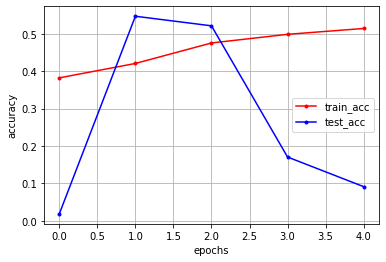

In [130]:
xtrain_len = np.arange(len(train_history))
plt.plot(xtrain_len, train_history, marker='.', c='red', label='train_acc')
plt.plot(xtrain_len, test_history, marker='.', c='blue', label='test_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.show()

학습은 원활히 진행되나, 성능에는 한계가 있어보인다. 다양한 파인튜닝 시도 필요

현 단계에서 가설을 결론내기에는 이르다고 생각해 좀 더 보완, 시도 후에 답을 찾는 과정 필요

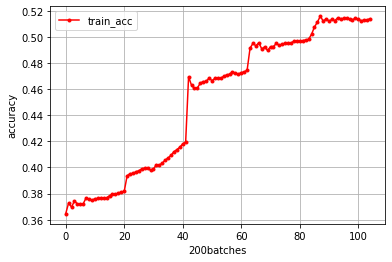

In [131]:

xtrain_len_bat = np.arange(len(train_history_batch))
plt.plot(xtrain_len_bat, train_history_batch, marker='.', c='red', label='train_acc')
# plt.plot(np.arange(4), xtest_hist, marker='.', c='blue', label='test_acc')
plt.legend()
plt.xlabel('200batches')
plt.ylabel('accuracy')
plt.grid()
plt.show()